** So sánh Linear Regression với MLP (dùng Pytourch) **

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

import torch
import torch.nn as nn
import torch.optim as optim

In [14]:
# Load Auto MPG dataset

auto = fetch_openml(name="autoMpg", version=1, as_frame=True)
df = auto.frame.copy()
auto


{'data':     cylinders  displacement  horsepower  weight  acceleration model origin
 0           8         307.0       130.0    3504          12.0    70      1
 1           8         350.0       165.0    3693          11.5    70      1
 2           8         318.0       150.0    3436          11.0    70      1
 3           8         304.0       150.0    3433          12.0    70      1
 4           8         302.0       140.0    3449          10.5    70      1
 ..        ...           ...         ...     ...           ...   ...    ...
 393         4         140.0        86.0    2790          15.6    82      1
 394         4          97.0        52.0    2130          24.6    82      2
 395         4         135.0        84.0    2295          11.6    82      1
 396         4         120.0        79.0    2625          18.6    82      1
 397         4         119.0        82.0    2720          19.4    82      1
 
 [398 rows x 7 columns],
 'target': 0      18.0
 1      15.0
 2      18.0
 3  

In [15]:
print(df.info())
df = df.dropna()

print(df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cylinders     398 non-null    category
 1   displacement  398 non-null    float64 
 2   horsepower    392 non-null    float64 
 3   weight        398 non-null    int64   
 4   acceleration  398 non-null    float64 
 5   model         398 non-null    category
 6   origin        398 non-null    category
 7   class         398 non-null    float64 
dtypes: category(3), float64(4), int64(1)
memory usage: 17.8 KB
None
(392, 8)


,cylinders,displacement,horsepower,weight,acceleration,model,origin,class
0,8,307.0,130.0,3504,12.0,70,1,18.0
1,8,350.0,165.0,3693,11.5,70,1,15.0
2,8,318.0,150.0,3436,11.0,70,1,18.0
3,8,304.0,150.0,3433,12.0,70,1,16.0
4,8,302.0,140.0,3449,10.5,70,1,17.0


In [16]:

print(df.info())
df = df.dropna()

print(df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cylinders     392 non-null    category
 1   displacement  392 non-null    float64 
 2   horsepower    392 non-null    float64 
 3   weight        392 non-null    int64   
 4   acceleration  392 non-null    float64 
 5   model         392 non-null    category
 6   origin        392 non-null    category
 7   class         392 non-null    float64 
dtypes: category(3), float64(4), int64(1)
memory usage: 20.5 KB
None
(392, 8)


,cylinders,displacement,horsepower,weight,acceleration,model,origin,class
0,8,307.0,130.0,3504,12.0,70,1,18.0
1,8,350.0,165.0,3693,11.5,70,1,15.0
2,8,318.0,150.0,3436,11.0,70,1,18.0
3,8,304.0,150.0,3433,12.0,70,1,16.0
4,8,302.0,140.0,3449,10.5,70,1,17.0


In [17]:
y = df['class'].values.astype(float)
x = df.drop(columns=['class']).values.astype(float)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42 )

x_mean = x_train.mean(axis=0)
x_std = x_train.std(axis=0)
x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(313, 7) (79, 7)
(313,) (79,)


In [18]:
class LinearRegressionModel:
    def __init__(self, input_dim, lr = 0.01, epochs = 1000):
        self.model = nn.Linear(input_dim, 1)
        self.criterion = nn.MSELoss()
        self.optimizer = optim.SGD(self.model.parameters(), lr=lr)
        self.epochs = epochs
        self.list_loss = []

    def train(self, x_train, y_train):
        x_train_tensor = torch.FloatTensor(x_train)
        y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)

        for epoch in range(self.epochs):
            self.model.train()
            self.optimizer.zero_grad()

            outputs = self.forward(x_train_tensor)
            loss = self.criterion(outputs, y_train_tensor)
            loss.backward()

            self.optimizer.step()
            self.list_loss.append(loss.item())

            if (epoch+1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{self.epochs}], Loss: {loss.item():.4f}')

    def forward(self, x):
        outputs = self.model(x)
        return outputs

Epoch [100/1000], Loss: 22.6652
Epoch [200/1000], Loss: 12.1097
Epoch [300/1000], Loss: 11.6979
Epoch [400/1000], Loss: 11.5345
Epoch [500/1000], Loss: 11.4171
Epoch [600/1000], Loss: 11.3291
Epoch [700/1000], Loss: 11.2618
Epoch [800/1000], Loss: 11.2095
Epoch [900/1000], Loss: 11.1683
Epoch [1000/1000], Loss: 11.1354


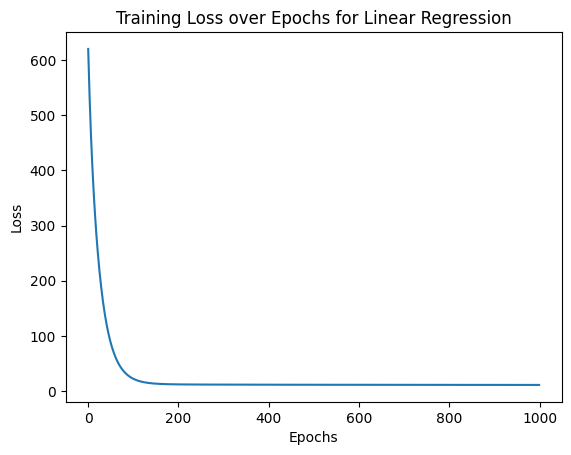

In [19]:
model1 = LinearRegressionModel(input_dim=x_train.shape[1], lr=0.01, epochs=1000)
model1.train(x_train, y_train)

plt.plot(model1.list_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs for Linear Regression')
plt.show()

In [ ]:
class MLP:
    def __init__(self, input_dim, lr=0.01, epochs=1000):
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
        self.criterion = nn.MSELoss()
        self.optimizer = optim.SGD(self.model.parameters(), lr=lr)
        self.epochs = epochs
        self.list_loss = []

    def train(self, x_train, y_train):
        x_train_tensor = torch.FloatTensor(x_train)
        y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)

        for epoch in range(self.epochs):
            self.model.train()
            self.optimizer.zero_grad()

            outputs = self.forward(x_train_tensor)
            loss = self.criterion(outputs, y_train_tensor)
            loss.backward()

            self.optimizer.step()
            self.list_loss.append(loss.item())

            if (epoch+1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{self.epochs}], Loss: {loss.item():.4f}')

    def forward(self, x):
        outputs = self.model(x)
        return outputs

Epoch [100/1000], Loss: 11.7189
Epoch [200/1000], Loss: 7.9094
Epoch [300/1000], Loss: 6.9461
Epoch [400/1000], Loss: 6.8562
Epoch [500/1000], Loss: 6.6360
Epoch [600/1000], Loss: 6.4276
Epoch [700/1000], Loss: 6.3657
Epoch [800/1000], Loss: 6.2301
Epoch [900/1000], Loss: 6.0738
Epoch [1000/1000], Loss: 5.9462


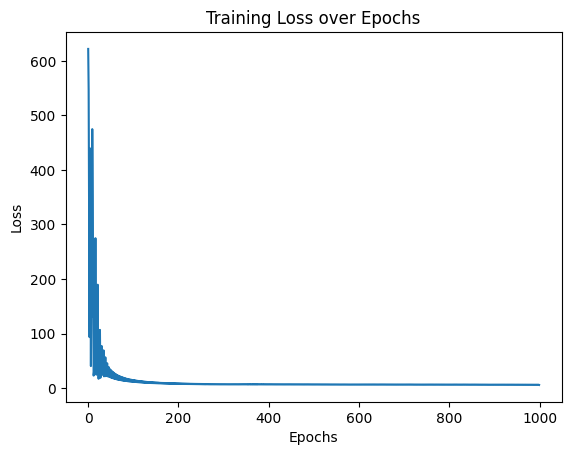

In [21]:
model2 = MLP(input_dim=x_train.shape[1], lr=0.01, epochs=1000)

model2.train(x_train, y_train)
plt.plot(model2.list_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

In [ ]:
# Compare

x_test_tensor = torch.FloatTensor(x_test)   
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

mse1 = nn.MSELoss()(model1.forward(x_test_tensor), y_test_tensor).item()
mse2 = nn.MSELoss()(model2.forward(x_test_tensor), y_test_tensor).item()

print(f'Linear Regression Test MSE: {mse1:.4f}')
print(f'MLP Test MSE: {mse2:.4f}')

Linear Regression Test MSE: 11.3506
MLP Test MSE: 7.6645
